Econometría Aplicada. Lección 8
===============================

**Author:** Marcos Bujosa



<div class="abstract" id="orge4e0865">
<p>
En esta lección repasamos los instrumentos de identificación y
diagnosis del análisis univariante. Extendemos la notación para
incorporar modelos con raíces unitarias. Presentamos modelos
estacionales y finalmente resumimos las ideas principales del análisis
univariante.
</p>

</div>



$
\newcommand{\lag}{\mathsf{B}}
\newcommand{\Sec}[1]{\boldsymbol{#1}}
\newcommand{\Pol}[1]{\boldsymbol{#1}}
$



#### Carga de algunas librerías de R



In [1]:
# cargamos algunas librerías de R
library(tfarima)      # librería de José Luis Gallego para Time Series
library(readr)        # para leer ficheros CSV
library(ggplot2)      # para el scatterplot (alternaticamente library(tidyverse))
library(ggfortify)    # para pintar series temporales
library(jtools)       # para representación resultados estimación
library(zoo)          # para generar objetos ts (time series)
# y fijamos el tamaño de las figuras que se generan en el notebook
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)

## Identificación y diagnosis



-   Combinando las herramientas gráficas y estadísticas que hemos visto,
    se puede inferir el modelo subyacente a los datos.

-   Este proceso de especificación empírica del modelo es conocido como
    "*identificación*"

El proceso de identificación puede estructurarse como una secuencia de
preguntas:

1.  ¿Es estacionaria la serie?
2.  ¿Tiene una media significativa?
3.  ¿Es persistente la ACF? ¿sigue alguna pauta reconocible?
4.  ¿Es persistente la PACF? ¿sigue alguna pauta reconocible?



-   La identificación se basa en estadísticos, como la media muestral o
    las autocorrelaciones, cuya representatividad depende de la
    estacionariedad de las series

-   Tras inducir la estacionariedad, especificamos un modelo tentativo
    decidiendo cuál de las funciones ACF o PACF es finita y cuál es
    persistente


| |<b>ACF finita</b>|<b>ACF persistente</b>|
|---|---|---|
| <b>PACF finita</b>|<u>Ruido blanco</u>: retardos conjuntamente NO significativos|<u>AR</u>: orden indicado por la PACF|
| <b>PACF persistente</b>|<u>MA</u>: orden indicado por la ACF|<u>ARMA</u>|

La parametrización de mayor orden en modelos ARMA con series
económicas suele ser ARMA($2,1$)



### Instrumentos de identificación




| |Instrumento|Objetivo y observaciones|
|---|---|---|
| Transf. logarítmica|Gráficos rango-media y serie temporal|Conseguir independizar la variabilidad de los datos de su nivel. Las series económicas suelen necesitar esta transformación|
| $d$, orden de diferenciación|Gráfico de la serie temporal. ACF (caída lenta y lineal). Contrastes de raíz unitaria|Conseguir que los datos fluctúen en torno a una media estable. En series económicas, $d$ suele ser 1 ó 2|
| Constante|Media de la serie diferenciada. Desviación típica de la media|Si la media de la serie transformada es significativa, el modelo debe incluir un término constante|
| $p$, orden AR|PACF de orden $p$. ACF infinita|PACF tiene $p$ valores no nulos. En series económicas $p$ suele ser $\leq2$|
| $q$, orden MA|ACF de orden $q$. PACF infinita|ACF tiene $q$ valores no nulos. En series económicas q suele ser $\leq1$|



### Instrumentos de diagnosis




| |Instrumento|Posible diagnóstico|
|---|---|---|
| $d$, orden de diferenciación|Raíces de los polinomios AR y MA|Raíz AR próxima a uno: quizá conviene añadir una diferencia.  Raíz MA próxima: quizá conviene quitar una diferencia.|
| $d$, orden de diferenciación|Gráfico de los residuos|Si muestra rachas largas de residuos positivos o negativos, puede ser necesaria una diferencia adicional.|
| Constante|Media de los residuos|Si es significativa: añadir término constante|
| Constante|Constante estimada|Si NO es significativa: el modelo mejorará quitando el término constante|
| $p$ y $q$,|Contrastes de significación|Pueden sugerir eliminar parámetros irrelevantes|
| $p$ y $q$,|ACF y PACF de los residuos. Test Q de Ljung-Box|Indican posibles pautas de autocorrelación no modelizadas|
| $p$ y $q$,|Correlaciones elevadas entre parámetros estimados|Puede ser un síntoma de sobreparametrización|



Por último, se puede aplicar un análisis exploratorio consistente en
añadir parámetros AR y/o MA, para comprobar si resultan significativos
y, además, mejoran el modelo



## Raíces unitarias



### Notación: operadores retardo y diferencia



El operador diferencia $\nabla$ se define a partir del operador retardo como $\nabla=(1 - \mathsf{B})$:
$$\nabla Y_t = (1 - \mathsf{B})Y_t = Y_t - Y_{t-1}$$
El operador diferencia estacional es 
${\nabla}_{_S} = (1 - \mathsf{B}^S)$:
$$\nabla_{_S}Y_t = (1 - \mathsf{B}^S)Y_t = Y_t - Y_{t-S}$$



#### Notación: ARIMA



Con \`\`ARIMA($p,d,q$)'', donde $d$ indica el número $d$ de diferencias
que la serie necesita para ser estacionaria en media, extendemos la
notación a procesos con raíces autorregresivas unitarias
$$\boldsymbol{\phi}_p*\nabla^d*\boldsymbol{Y} = \boldsymbol{\theta}_q*
\boldsymbol{U}$$ es decir $$\boldsymbol{\phi}_p(\mathsf{B})\nabla^d
Y_t = \boldsymbol{\theta}_q(\mathsf{B}) U_t; \quad t\in\mathbb{Z}$$



### Raíces unitarias en los polinomios AR y MA



Cuando el polinomio AR tiene alguna raíz igual a uno, se dice que
tiene “raíces unitarias”. Si el polinomio corresponde a un modelo
estimado, esto es síntoma de subdiferenciación.

Si la raíz unitaria está en el polinomio MA y este ha sido estimado,
esto es síntoma de: (a) sobrediferenciación o (b) presencia de
componentes deterministas, si además si tiene media significativa.

Ejemplos


| Modelo expresado con raíz unitaria en $\boldsymbol{\phi}$ o $\boldsymbol{\theta}$|Modelo equivalente sin raíces unitarias en $\boldsymbol{\phi}$ o $\boldsymbol{\theta}$|
|---|---|
| $(1-1.5\mathsf{B}+.5\mathsf{B}^2) Y_t = U_t$|$(1-0.5\mathsf{B})\nabla Y_t=U_t$|
| $(1-.5\mathsf{B}+0.7\mathsf{B}^2)\nabla^2Y_t=(1-\mathsf{B})U_t$|$(1-.5\mathsf{B}+0.7\mathsf{B}^2)\nabla Y_t =  U_t$|
| $\nabla Y_t = \beta+          (1-\mathsf{B}) U_t$|$Y_t = \beta t + U_t$|



### Paseos aleatorios



Un paseo aleatorio representa una variable cuyos cambios son ruido
blanco: $$Y_t = \mu + Y_{t-1} + U_t$$

Cuando $\mu=0$ se denomina sencillamente *paseo aleatorio*: $\;\nabla Y_t =  U_t$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
rw <- um(i = "(1 - B)")
ide(sim(rw, n = 500), lag.max = 20, graphs = c("plot", "acf", "pacf", "pgram"), main = "Paseo aleatorio")

![img](./img/lecc08/ACF-RW.png)



Cuando $\mu\ne0$ se denomina *paseo aleatorio con deriva*: $\;\nabla Y_t = \mu +  U_t$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 200)
rwcd <- um(i = "(1 - B)",
           mu=.25)
ide(sim(rwcd, n = 500),
    lag.max = 20,
    graphs = c("plot", "acf", "pacf", "pgram"),
    main = "Paseo aleatorio con deriva (mu=0.25)")

![img](./img/lecc08/ACF-RWcd.png)

El proceso tiene mayor inercia cuanto mayor es $|\mu|$. El signo de
$\mu$ determina el signo de la pendiente global.



## Modelos ARIMA estacionales (SARIMA)



El período estacional $S$ es el número mínimo de observaciones
necesarias para recorrer un ciclo estacional completo. Por ejemplo,
$S=12$ para datos mensuales, $S=4$ para datos trimestrales, etc.

Describiremos comportamientos estacionales con modelos
ARIMA$(p,d,q)\times(P,D,Q)_S$ 

$$\boldsymbol{\phi}_p(\mathsf{B})\boldsymbol{\Phi}_P(\mathsf{B}^S)\nabla^d\nabla_{_S}^D
Y_t =
\boldsymbol{\theta}_q(\mathsf{B})\boldsymbol{\Theta}_q(\mathsf{B}^S)
U_t; \quad t\in\mathbb{Z}$$ donde

\begin{align*}
\boldsymbol{\Phi}_P(\mathsf{B}^S)  = & 1-\Phi_1\mathsf{B}^{1\cdot S}-\Phi_2\mathsf{B}^{2\cdot S}-\cdots-\Phi_P\mathsf{B}^{P\cdot S}\\
\boldsymbol{\Theta}_Q(\mathsf{B}^S)  = & 1-\Theta_1\mathsf{B}^{1\cdot S}-\Theta_2\mathsf{B}^{2\cdot S}-\cdots-\Theta_Q\mathsf{B}^{Q\cdot S}\\
{\nabla}_{_S}^D = & (1 - \mathsf{B}^S)^D
\end{align*}

Es decir, el modelo consta de polinomios autorregresivos y de media
móvil tanto regulares (en minúsculas) como estacionales (en
mayúsculas).



Veamos un ejemplo de un modelo MA($1$) estacional y otro de un modelo
AR($1$) estacional&#x2026;



### MA(1) estacional con raíz positiva



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
SMA1 <- um(ma = "(1 - 0.9B12)")
display(list(SMA1), lag.max = 50, byrow = TRUE)

MA($1$) estacional:
$\quad\boldsymbol{\Theta}=1-0.9z^{12}\quad\Rightarrow\quad X_t= (1-0.9
\mathsf{B}^{12})U_t$

![img](./img/lecc08/ACF-SMA1p.png)



In [1]:
roots(SMA1)

1. 
   |          Real |     Imaginary |  Modulus |  Frequency | Period | Mult. |
   |---------------+---------------+----------+------------+--------+-------|
   |  1.008819e+00 |  1.082287e-14 | 1.008819 | 0.00000000 |    Inf |     1 |
   |  8.736626e-01 |  5.044094e-01 | 1.008819 | 0.08333333 |   12.0 |     1 |
   |  8.736626e-01 | -5.044094e-01 | 1.008819 | 0.08333333 |   12.0 |     1 |
   |  5.044094e-01 | -8.736626e-01 | 1.008819 | 0.16666667 |    6.0 |     1 |
   |  5.044094e-01 |  8.736626e-01 | 1.008819 | 0.16666667 |    6.0 |     1 |
   |  1.288336e-14 | -1.008819e+00 | 1.008819 | 0.25000000 |    4.0 |     1 |
   | -2.057493e-17 |  1.008819e+00 | 1.008819 | 0.25000000 |    4.0 |     1 |
   | -5.044094e-01 | -8.736626e-01 | 1.008819 | 0.33333333 |    3.0 |     1 |
   | -5.044094e-01 |  8.736626e-01 | 1.008819 | 0.33333333 |    3.0 |     1 |
   | -8.736626e-01 | -5.044094e-01 | 1.008819 | 0.41666667 |    2.4 |     1 |
   | -8.736626e-01 |  5.044094e-01 | 1.008819 | 0.41666667 |

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(SMA1, n = 500),
    lag.max = 50,
    graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc08/Sim-SMA1p.png)



### AR(1) estacional con raíz positiva



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
SAR1 <- um(ar = "(1 - 0.9B12)")
display(list(SAR1), lag.max = 50, byrow = TRUE)

AR($1$) estacional:
$\quad\boldsymbol{\Phi}=1-0.9z^{12}\quad\Rightarrow\quad (1-0.9
\mathsf{B}^{12})X_t= U_t$

![img](./img/lecc08/ACF-SAR1p.png)



In [1]:
roots(SAR1)

Evidentemente las raíces son iguales a las del caso anterior (aunque ahora corresponden al polinomio autorregresivo).



In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(SAR1, n = 500),
    lag.max = 50,
    graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc08/Sim-SAR1p.png)



Con estos dos ejemplos hemos podido apreciar que:

-   las pautas de autocorrelación son análogas a las de los MA(1) y
    AR(2), pero ahora los retardos significativos corresponden a los
    retardos estacionales, es decir, a múltiplos del período estacional
    $S$.

-   las correlaciones correspondientes a los “retardos regulares” (es
    decir, todos menos menos los estacionales) son no significativas en
    general.

-   En estos ejemplos, en los que $S=12$, los retardos estacionales son:
    12, 24, 36, 48, 60,&#x2026;



Veamos ahora un par de ejemplos de modelos estacionales
multiplicativos (i.e., con parte regular y parte estacional).



### ARIMA$(0,0,1)\times(0,0,1)_{12}$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
MA1SMA1 <- um(ma = "(1 - 0.9B)(1 - 0.9B12)")
display(list(MA1SMA1), lag.max = 50, byrow = TRUE)

ARIMA$(0,0,1)\times(0,0,1)_{12}$:
$\quad X_t= (1-0.9 \mathsf{B})(1-0.9 \mathsf{B}^{12})U_t$

![img](./img/lecc08/ACF-MA1SMA1.png)



In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(MA1SMA1, n = 500),
    lag.max = 50,
    graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc08/Sim-MA1SMA1.png)



### ARIMA$(1,0,0)\times(0,0,1)_{12}$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
AR1SMA1 <- um(ar = "(1 - 0.9B)", ma = "(1 - 0.9B12)")
display(list(AR1SMA1), lag.max = 50, byrow = TRUE)

ARIMA$(1,0,0)\times(0,0,1)_{12}$:
$\quad (1-0.9 \mathsf{B})X_t= (1-0.9 \mathsf{B}^{12})U_t$

![img](./img/lecc08/ACF-AR1SMA1.png)



#+attr_org: :width 1200 :height 500


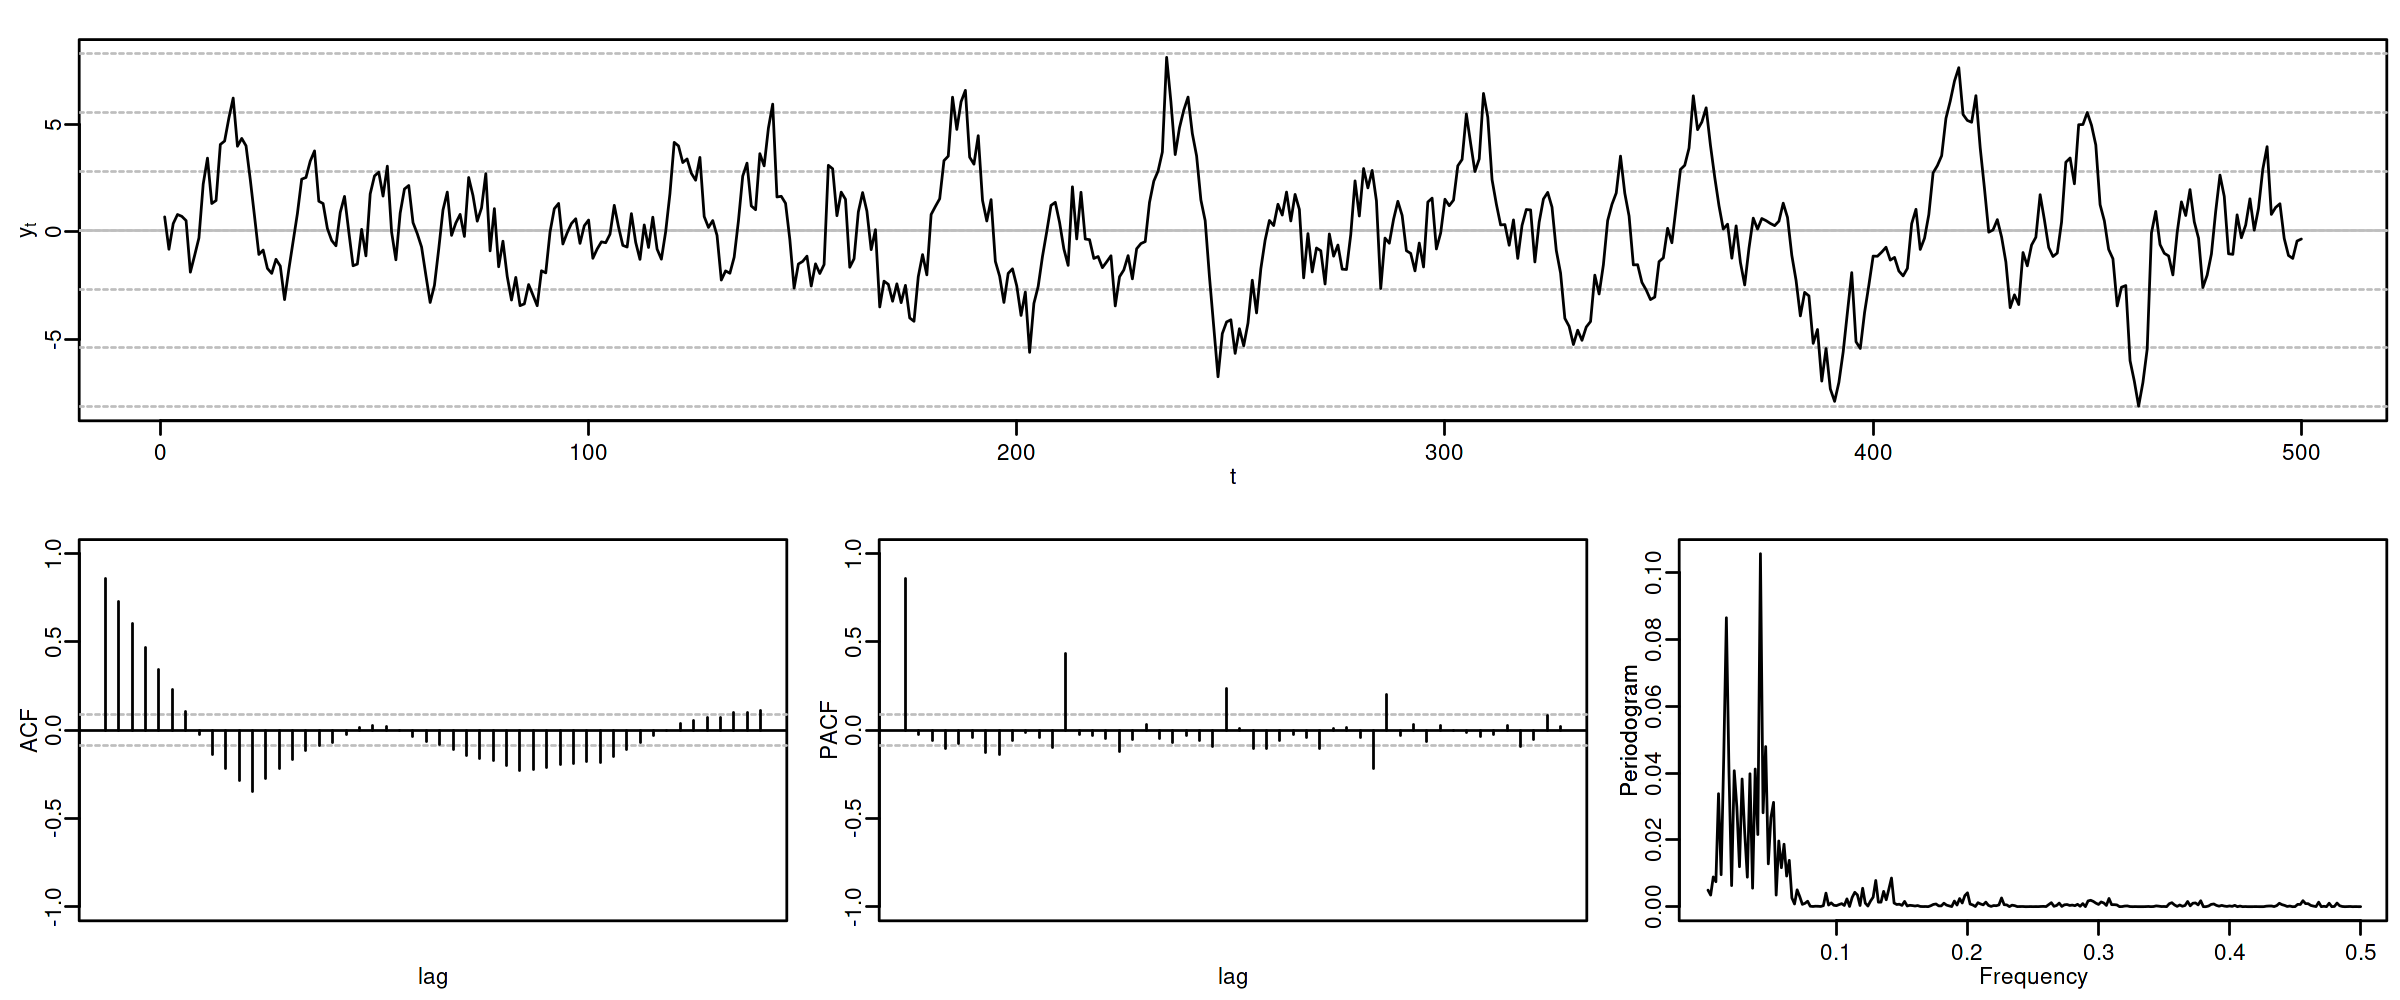

In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(AR1SMA1, n = 500),
    lag.max = 50,
    graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc08/Sim-AR1SMA1.png)



### ARIMA$(1,0,0)\times(1,0,0)_{12}$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
AR1SAR1 <- um(ar = "(1 - 0.9B)(1 - 0.9B12)")
display(list(AR1SAR1), lag.max = 50, byrow = TRUE, log.spec = TRUE)

ARIMA$(1,0,0)\times(1,0,0)_{12}$:
$\quad (1-0.9 \mathsf{B})(1-0.9 \mathsf{B}^{12})X_t= U_t$

![img](./img/lecc08/ACF-AR1SAR1.png)



In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(AR1SAR1, n = 500),
    lag.max = 50,
    graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc08/Sim-AR1SAR1.png)



### ARIMA$(0,0,1)\times(1,0,0)_{12}$



In [1]:
options(repr.plot.width = 12, repr.plot.height = 2, repr.plot.res = 200)
MA1SAR1 <- um(ar = "(1 - 0.9B12)", ma = "(1 - 0.9)")
display(list(MA1SAR1), lag.max = 50, byrow = TRUE, log.spec = TRUE)

ARIMA$(0,0,1)\times(1,0,0)_{12}$:
$\quad (1-0.9 \mathsf{B}^{12})X_t= (1-0.9 \mathsf{B})U_t$

![img](./img/lecc08/ACF-MA1SAR1.png)



In [1]:
options(repr.plot.width = 12, repr.plot.height = 5, repr.plot.res = 200)
ide(sim(MA1SAR1, n = 500),
    lag.max = 50,
    graphs = c("plot", "acf", "pacf", "pgram"))

![img](./img/lecc08/Sim-MA1SAR1.png)



En estos cuatro ejemplos hemos podido apreciar que

-   en el entorno de los retardos estacionales surgen una serie de
    coeficientes significativos (“satélites”) que proceden de la
    interacción entre las estructuras regular y estacional
-   Estos satélites son útiles para identificar en qué retardos
    estacionales hay autocorrelaciones no nulas, pero no requieren una
    parametrización especial.



## Resumen del análisis univariante de series temporales



### Ideas principales



-   Se basa en modelos sin variables exógenas que resumen la
    interdependencia temporal con polinomios de órdenes reducidos.
-   Está especialmente indicado para predecir el futuro de la serie
    temporal.
-   Parte de dos supuestos sobre el proceso estocástico subyacente: 
    1.  es débilmente estacionario
    2.  tiene representación en forma de proceso lineal $Y_t=\sum_{j=0}^\infty a_j U_{t-j}$
-   (Además se suele asumir normalidad en $U_t$)
-   utiliza variados instrumentos: (a) gráficos (b) función de
    autocorrelación (c) función de autocorrelación parcial, (d)
    estadístico Q de Ljung-Box, etc&#x2026;
-   Si la serie original no "parece" débilmente estacionaria, se induce
    esta propiedad mediante las transformaciones adecuadas


| |<b>ACF finita</b>|<b>ACF persistente</b>|
|---|---|---|
| <b>PACF finita</b>|<u>Ruido blanco</u>: retardos conjuntamente NO significativos|<u>AR</u>: orden indicado por la PACF|
| <b>PACF persistente</b>|<u>MA</u>: orden indicado por la ACF|<u>ARMA</u>|



### Metodología



Tres fases:

-   **Identificación:** Elija una especificación provisional para el
    proceso estocástico generador de los datos en base a las
    características medibles de los datos: “dejar que los datos hablen”
-   **Estimación:** suele requerir métodos iterativos
-   **Diagnosis:** de la calidad estadística del modelo ajustado. Algunos
    controles estándar son:
    -   Significatividad de los parámetros estimados
    -   Estacionariedad y homocedasticidad de los residuos
    -   ¿Existe un patrón de autocorrelación residual que podría ser
        modelado? ¿O hemos logrado que los residuos sean <u>*"ruido
        blanco"*</u>?

Si la diagnosis no es satisfactoria, se vuelve a la primera fase.

Si la diagnosis es satisfactoria, se usa el modelo.

